In [22]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib as mt
import seaborn as sns

# Fáza 1 - prieskumná analýza

## 1. Základný opis dát spolu s ich charakteristikami (5 bodov)


In [23]:
dataset = pd.read_csv("042/labor.csv", delimiter="\t")
dataset.drop(dataset.columns[0], axis=1, inplace=True)
dataset

,name,hematokrit,smoker,leukocyty,relationship,ssn,alt,weight,erytrocyty,alp,ast,er-cv,etytr,hemoglobin,trombocyty,indicator,hbver
0,Courtney Sparks,5.10789,no,3.67594,married,211-15-5030,1.36076,65.50748,7.92270,80.65839,40.27331,46.67907,6.93084,7.07385,2.43339,0.0,6.73439
1,David Cook,6.06717,no,6.61722,divoced,134-25-6459,1.10335,80.56053,7.13748,95.49950,51.14865,21.09764,6.17378,6.30636,3.16922,0.0,6.69188
2,Diane Dunn,NaN,no,8.84155,married,410-38-6674,2.32670,165.53795,8.77005,88.36972,56.40210,28.48174,7.23321,6.44218,6.13313,0.0,6.33770
3,Debra Cameron,8.52161,Y,8.76540,married,327-02-6401,3.08378,56.12232,9.11128,57.21363,57.61393,67.05110,7.25101,7.74219,5.54453,0.0,6.08754
4,Vincent Mccullough,4.35962,no,6.61320,divoced,469-50-8029,5.08135,93.52107,9.68805,82.12788,75.41991,53.04260,6.18335,5.69975,5.34519,0.0,6.34100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10034,Kenneth Sanchez,4.67432,N,5.22478,married,035-07-2574,0.75385,4.79395,7.40597,80.98445,42.89142,47.93544,5.69357,6.46889,4.59180,0.0,6.23398
10035,Jennifer Franklin,5.38144,Y,6.77403,widowed,369-05-1763,0.68170,72.43763,7.38835,88.27656,55.07674,43.86325,5.33810,6.04664,8.02259,1.0,7.56910
10036,Valerie Carter,3.16568,Y,6.30583,married,546-10-0083,0.49297,26.26844,6.22727,49.46443,56.32268,59.28561,8.32349,4.43833,9.62061,1.0,7.53199
10037,Julie Newman,4.80303,Y,6.78358,widowed,556-01-2815,1.92676,57.92751,8.64693,44.97615,53.85140,56.17723,7.25014,8.14832,6.77935,1.0,4.97849


### Počet záznamov a počet attrubútov:


In [24]:
profiles = len(dataset.index)
attributes = len(dataset.columns)
data = [[profiles], [attributes]]
sum_of_dataset = pd.DataFrame(data, columns = ['Number'], index = ['Profiles','Attributes'])
sum_of_dataset.style

,Number
Profiles,10039
Attributes,17


### Typy dát:
Jednotlivé typy dát sú viditeľné v nasledujúcej tabuľke

In [25]:
info = pd.DataFrame(dataset.dtypes)
info = info.set_axis(['Dtype'], axis=1, inplace=False)
info.style


,Dtype
name,object
hematokrit,float64
smoker,object
leukocyty,float64
relationship,object
ssn,object
alt,float64
weight,float64
erytrocyty,float64
alp,float64


### Distribúcie významných atribút:

Histogramy boli vytvorené pre niekoľkých atribút, napr. **hematokrit, leukocyty, alt, weight, erytrocyty, alp,
ast, er-cv, etytr, hemoglobin, trombocyty, indicator, hbver**


array([[<AxesSubplot:title={'center':'hematokrit'}>,
        <AxesSubplot:title={'center':'leukocyty'}>,
        <AxesSubplot:title={'center':'alt'}>,
        <AxesSubplot:title={'center':'weight'}>],
       [<AxesSubplot:title={'center':'erytrocyty'}>,
        <AxesSubplot:title={'center':'alp'}>,
        <AxesSubplot:title={'center':'ast'}>,
        <AxesSubplot:title={'center':'er-cv'}>],
       [<AxesSubplot:title={'center':'etytr'}>,
        <AxesSubplot:title={'center':'hemoglobin'}>,
        <AxesSubplot:title={'center':'trombocyty'}>,
        <AxesSubplot:title={'center':'indicator'}>],
       [<AxesSubplot:title={'center':'hbver'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

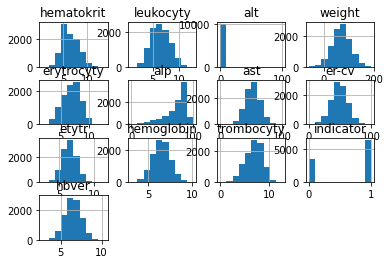

In [26]:
# dataset.head()
dataset.hist()

### Základné deskriptívne štatistiky

K základný deskriptívnym štatistikám sa patria vypočítanie **mediánu, modusu, priemera, smerodajnej odchýlky, minimálnej a maximálnej hodnoty, variancie...**

*Vypočítanie modusu nemá význam, pretože jednotlivé záznamy sú jednoznačné, nevyskytujú sa viacerokrát*

In [27]:
# dataset.head()
desc_stat_table = dataset.select_dtypes(include=[np.float64])
# desc_stat = pd.DataFrame(columns= desc_stat_table.columns)
desc_stat = dataset.describe()
# desc_stat.loc['Mean'] = desc_stat_table.mean()
desc_stat.loc['median'] = desc_stat_table.median()
desc_stat.loc['variance'] = desc_stat_table.var()
# modus nie je mozne urobit, nie su jednoznacne
desc_stat

# desc_stat

,hematokrit,leukocyty,alt,weight,erytrocyty,alp,ast,er-cv,etytr,hemoglobin,trombocyty,indicator,hbver
count,10008.000000,10009.000000,10009.000000,10039.000000,10009.000000,10008.000000,10009.000000,10009.000000,10008.000000,10009.000000,10009.000000,10039.000000,10009.000000
mean,6.453032,6.450274,1.306090,69.805192,6.898802,71.949719,52.343359,49.060376,6.476717,6.464414,6.828460,0.642295,6.475601
std,1.665991,1.700428,2.080683,35.581044,1.605785,18.109229,11.880597,13.084279,0.994156,1.006072,1.734330,0.479349,1.004527
min,0.683890,0.979140,0.000000,-59.892790,1.811270,0.000000,0.000000,0.000000,2.678710,3.054200,0.000000,0.000000,2.738210
25%,5.197180,5.177990,0.521560,46.183730,5.748830,63.818647,44.490180,40.393810,5.802672,5.786020,5.665190,0.000000,5.806840
50%,6.227605,6.352150,0.773820,70.018130,7.036180,78.203065,52.376590,48.923340,6.480035,6.476210,7.002890,1.000000,6.478430
75%,7.669982,7.693890,1.344220,93.175640,8.052080,84.986902,60.275100,57.766910,7.147997,7.140870,8.078720,1.000000,7.147590
max,13.633550,12.694630,100.000000,188.436090,12.733320,100.000000,100.000000,100.000000,11.426920,10.112330,12.595220,1.000000,10.361820
median,6.227605,6.352150,0.773820,70.018130,7.036180,78.203065,52.376590,48.923340,6.480035,6.476210,7.002890,1.000000,6.478430
variance,2.775527,2.891457,4.329243,1266.010690,2.578547,327.944181,141.148595,171.198357,0.988347,1.012181,3.007899,0.229775,1.009075


# Párová analýza dát
V tejto sekcii sme preskúmali koreláciu medzi jednotlivými atribútmi pomocou funkcie matshow() z knižnice matplotlib.
Ako je možné vidieť najvyššia pozitívna korelácia je medzi atribútom 'indicator' a atribútom 'trombocyty'.
Druhá najvyššia pozitívna korelácia je medzi atribútom 'etrocyty' a atribútom 'alt'.
Najvyššia negatívna korelácia je medzi atribútom 'erytrocyty' a atribútom 'hematokrit'.

,hematokrit,leukocyty,alt,weight,erytrocyty,alp,ast,er-cv,etytr,hemoglobin,trombocyty,indicator,hbver
hematokrit,1.000000,-0.035522,-0.189589,-0.001973,-0.465486,0.016232,-0.005173,0.005333,0.002552,-0.015807,-0.035439,-0.000303,0.010663
leukocyty,-0.035522,1.000000,0.168388,-0.013297,0.325243,0.006254,0.008797,-0.003789,0.001818,0.002873,0.152565,0.003806,-0.027663
alt,-0.189589,0.168388,1.000000,-0.008129,0.562912,0.003450,-0.000498,-0.004342,0.004709,0.000778,-0.249282,-0.088956,-0.016101
weight,-0.001973,-0.013297,-0.008129,1.000000,0.005316,0.008733,0.018511,0.005936,0.006945,-0.000762,0.001160,-0.000745,0.002998
erytrocyty,-0.465486,0.325243,0.562912,0.005316,1.000000,0.004859,0.004136,0.007379,0.005965,0.014648,-0.339868,-0.324942,-0.009878
alp,0.016232,0.006254,0.003450,0.008733,0.004859,1.000000,0.000184,-0.010546,0.000059,-0.222828,0.006122,0.009448,-0.004786
ast,-0.005173,0.008797,-0.000498,0.018511,0.004136,0.000184,1.000000,-0.010656,-0.011953,0.007756,0.009759,-0.005213,0.011179
er-cv,0.005333,-0.003789,-0.004342,0.005936,0.007379,-0.010546,-0.010656,1.000000,-0.002173,0.007510,-0.002161,0.002313,0.001687
etytr,0.002552,0.001818,0.004709,0.006945,0.005965,0.000059,-0.011953,-0.002173,1.000000,0.000625,-0.008126,-0.012031,0.000659
hemoglobin,-0.015807,0.002873,0.000778,-0.000762,0.014648,-0.222828,0.007756,0.007510,0.000625,1.000000,-0.000889,0.007017,0.003178


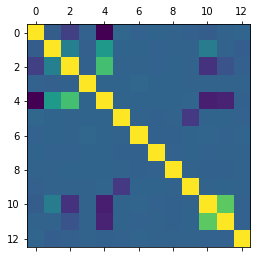

In [28]:
"""Parova analyza dat"""

correllation = dataset.corr()
mt.pyplot.matshow(correllation)
correllation.style.background_gradient(cmap='coolwarm')


Podľa korelácie vieme, že alt a erytrocyty majú súvislosť (0,56), čo znamená,
že môžeme skúsiť vytvoriť graf, aby sme dozvedeli viac z toho.

Podľa grafu sme sa dozvedeli, že čím viacej máme alt hodnotu, tým viacej máme erytrocyty.
Erytrocyty sa zväčšujú logaritmicky.

<AxesSubplot:xlabel='alt', ylabel='erytrocyty'>

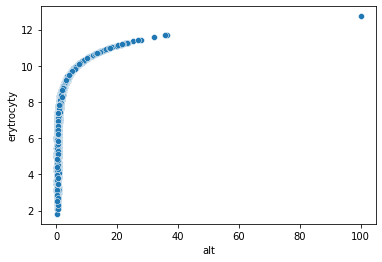

In [29]:
#a_e = sns.load_dataset(dataset)
#sns.regplot(data=dataset, x="alt", y="erytrocyty", color=".3")
#sns.regplot(data=dataset, x="indicator", y="trombocyty", color=".3")
# sns.regplot(data=a_e, x="size", y="tip", color=".3")
sns.scatterplot(data=dataset, x='alt', y='erytrocyty')


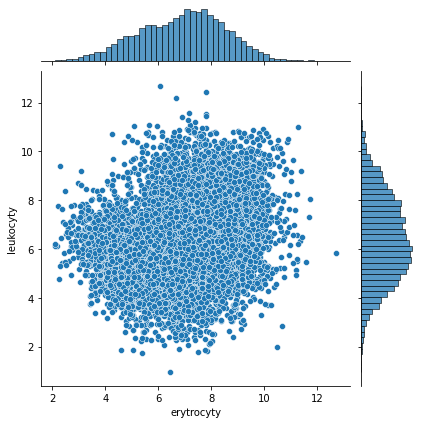

In [40]:
sns.jointplot(data=dataset, x='erytrocyty', y='leukocyty')


Pomocou boxplotu môžeme vidieť, že čím vyššie sú trombocyty, tým vyšší je indicator.
Z tejto korelácie môžeme vyčítať, že vyššie trombocyty znamenajú horší stav pacienta s leukémiou.

<AxesSubplot:xlabel='indicator', ylabel='trombocyty'>

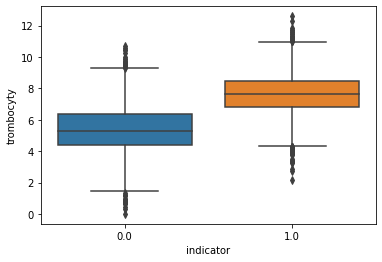

In [30]:
sns.boxplot(data=dataset, x='indicator', y='trombocyty')
#dataset.head()

<AxesSubplot:xlabel='indicator', ylabel='erytrocyty'>

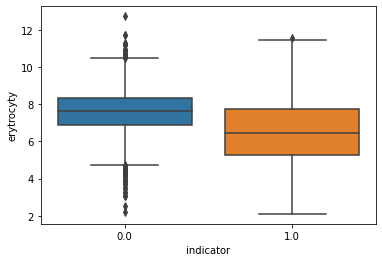

In [41]:
sns.boxplot(data=dataset, x='indicator', y='erytrocyty')

In [31]:
"""Identifikacia problemov"""
dataset = dataset.dropna()
# dataset.head()
smoker_series = dataset['smoker']
replacement_dict = {
    "Y": True,
    "yes": True,
    "N": False,
    "no": False
}
dataset["smoker"].replace(replacement_dict, inplace=True)
dataset["relationship"].replace("divoced","divorced",inplace=True)
# dataset.drop_duplicates(subset='name', inplace=True)
dataset.reset_index(drop=True, inplace=True)
dataset
# print(smoker_series.unique())

C:\Users\szacs\PycharmProjects\IAU\venv\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,name,hematokrit,smoker,leukocyty,relationship,ssn,alt,weight,erytrocyty,alp,ast,er-cv,etytr,hemoglobin,trombocyty,indicator,hbver
0,Courtney Sparks,5.10789,False,3.67594,married,211-15-5030,1.36076,65.50748,7.92270,80.65839,40.27331,46.67907,6.93084,7.07385,2.43339,0.0,6.73439
1,David Cook,6.06717,False,6.61722,divorced,134-25-6459,1.10335,80.56053,7.13748,95.49950,51.14865,21.09764,6.17378,6.30636,3.16922,0.0,6.69188
2,Debra Cameron,8.52161,True,8.76540,married,327-02-6401,3.08378,56.12232,9.11128,57.21363,57.61393,67.05110,7.25101,7.74219,5.54453,0.0,6.08754
3,Vincent Mccullough,4.35962,False,6.61320,divorced,469-50-8029,5.08135,93.52107,9.68805,82.12788,75.41991,53.04260,6.18335,5.69975,5.34519,0.0,6.34100
4,Lauren Harris,5.32524,True,6.52586,divorced,755-50-6094,0.89996,57.01768,7.78640,80.50126,44.08776,60.41555,5.33112,6.68497,7.49621,1.0,6.88636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9708,Kenneth Sanchez,4.67432,False,5.22478,married,035-07-2574,0.75385,4.79395,7.40597,80.98445,42.89142,47.93544,5.69357,6.46889,4.59180,0.0,6.23398
9709,Jennifer Franklin,5.38144,True,6.77403,widowed,369-05-1763,0.68170,72.43763,7.38835,88.27656,55.07674,43.86325,5.33810,6.04664,8.02259,1.0,7.56910
9710,Valerie Carter,3.16568,True,6.30583,married,546-10-0083,0.49297,26.26844,6.22727,49.46443,56.32268,59.28561,8.32349,4.43833,9.62061,1.0,7.53199
9711,Julie Newman,4.80303,True,6.78358,widowed,556-01-2815,1.92676,57.92751,8.64693,44.97615,53.85140,56.17723,7.25014,8.14832,6.77935,1.0,4.97849


In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9713 entries, 0 to 9712
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          9713 non-null   object 
 1   hematokrit    9713 non-null   float64
 2   smoker        9713 non-null   bool   
 3   leukocyty     9713 non-null   float64
 4   relationship  9713 non-null   object 
 5   ssn           9713 non-null   object 
 6   alt           9713 non-null   float64
 7   weight        9713 non-null   float64
 8   erytrocyty    9713 non-null   float64
 9   alp           9713 non-null   float64
 10  ast           9713 non-null   float64
 11  er-cv         9713 non-null   float64
 12  etytr         9713 non-null   float64
 13  hemoglobin    9713 non-null   float64
 14  trombocyty    9713 non-null   float64
 15  indicator     9713 non-null   float64
 16  hbver         9713 non-null   float64
dtypes: bool(1), float64(13), object(3)
memory usage: 1.2+ MB


In [33]:
# Second dataset

dataprofiles = pd.read_csv("042/profiles.csv", delimiter="\t")
dataprofiles.drop(dataprofiles.columns[0], axis=1, inplace=True)
dataprofiles.drop_duplicates(subset="name", inplace=True)
dataprofiles['birthdate'] = pd.to_datetime(dataprofiles['birthdate'])
dataprofiles.dropna(inplace=True)
dataprofiles


,blood_group,company,job,ssn,sex,birthdate,race,name,address
0,A-,Yu Group,"Engineer, energy",383-82-1198,M,1946-08-10,White,John Beard,"2896 Juan Manor\nNorth Douglasmouth, LA 50163"
1,O-,"Chase, Brown and Price","Designer, furniture",828-02-1024,M,1933-01-31,Black,Dustin Oneal,"225 Moore Glen Suite 019\nAmandastad, WA 64166"
2,O+,"Martinez, Medina and Myers",Medical technical officer,604-55-3198,F,1989-11-29,Hawaiian,Rachel Brown,"51910 Timothy Lane\nHorneburgh, DE 96504"
3,O-,Odonnell-Weber,Neurosurgeon,235-52-1947,M,1975-10-07,Black,Robert Johnson,5654 Kimberly Points Suite 971\nSouth Robinshi...
4,O-,Velazquez Ltd,Homeopath,160-55-3346,F,1934-06-16,White,Stephanie Rodriguez,"25985 Kyle Terrace\nPamelaland, CA 64245"
...,...,...,...,...,...,...,...,...,...
3055,O-,"Ramirez, Chambers and Lee",Multimedia specialist,129-93-9411,M,2010-08-23,Black,Adam Owens,"798 Brown Centers\nWest Kristin, AL 16008"
3056,O-,"Bennett, Porter and Diaz","Nurse, learning disability",073-31-8151,F,2013-03-15,Black,Pamela Tapia MD,"328 Sanchez River Suite 664\nSolishaven, CA 16716"
3057,O-,Ward Group,Town planner,496-75-4226,F,1916-07-28,Black,Crystal Anderson,Unit 0796 Box 7005\nDPO AA 92880
3058,O+,Jenkins-Turner,"Administrator, arts",895-70-8728,F,1928-02-29,Asian,Emily Walker,"574 James Crossroad Suite 057\nDeanfort, WY 09541"
